In [1]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer, OneHotEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import calibration_curve


# pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

In [2]:
stream = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streaming.csv")
stream.head()

,gender,age,income,monthssubbed,plan,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,topgenre,secondgenre,churn
0,woman,38.0,92.29,35,P,9.34,0,1,0.0,0,0,1,130.39,Drama,Thriller,0
1,woman,43.0,63.40,41,P,11.36,0,2,0.0,0,1,1,144.10,Horror,RomanticComedy,0
2,nonbinary,54.0,54.87,59,A,11.82,1,2,0.0,0,0,1,256.46,ScienceFiction,Comedy,1
3,woman,46.0,89.20,41,B,46.89,1,2,1.0,1,1,0,47.66,RomanticComedy,ScienceFiction,1
4,man,42.0,75.61,17,A,39.18,1,2,0.0,0,0,0,137.22,Comedy,Drama,0


In [3]:
# check null
stream.isnull().sum()

gender                 0
age                 1993
income              1492
monthssubbed           0
plan                   0
meanhourswatched       0
competitorsub          0
numprofiles            0
cancelled            200
downgraded             0
bundle                 0
kids                   0
longestsession         0
topgenre               0
secondgenre            0
churn                  0
dtype: int64

In [4]:
# drop missing
stream.dropna(inplace = True)
stream.reset_index(inplace = True)

In [5]:
predictors = ["gender","age","income", "monthssubbed", "plan", "meanhourswatched", "competitorsub", "topgenre", "secondgenre", "numprofiles", "cancelled", "downgraded", "bundle", "kids", "longestsession" ]
X = stream[predictors]
y = stream["churn"]


# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 123)

contpreds =  ["age","income", "monthssubbed",  "meanhourswatched",   "numprofiles",   "longestsession" ]
catpreds =  ["gender","plan",   "competitorsub", "topgenre", "secondgenre", "cancelled", "downgraded", "bundle", "kids" ]
# create empty model
pre = make_column_transformer((StandardScaler(), contpreds),
                            (OneHotEncoder(), catpreds),
                            remainder = "passthrough")

lr = LogisticRegression()


pipe = Pipeline([
    ("preprocessing", pre),
    ("model", lr)
])

# fit
pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

print("Train Acc       : ", accuracy_score(y_train, y_pred_train))
print("Train Prescision: ", precision_score(y_train, y_pred_train))
print("Train Recall    : ", recall_score(y_train, y_pred_train))
print("Train F1        : ", f1_score(y_train, y_pred_train))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))


print("Test Acc        : ", accuracy_score(y_test, y_pred_test))
print("Test Prescision : ", precision_score(y_test, y_pred_test))
print("Test Recall     : ", recall_score(y_test, y_pred_test))
print("Test F1         : ", f1_score(y_test, y_pred_test))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))


Train Acc       :  0.7409661600528641
Train Prescision:  0.6045072912063633
Train Recall    :  0.27682221053057593
Train F1        :  0.379746835443038
Train ROC AUC   :  0.7355394507748503
Test Acc        :  0.7424100156494523
Test Prescision :  0.6197068403908795
Test Recall     :  0.27542526239594645
Test F1         :  0.3813580556251566
Test ROC AUC    :  0.7384517824801561


In [6]:

tree = GradientBoostingClassifier(random_state = 123)


pipe_gb = Pipeline([
    ("preprocessing", pre),
    ("tree", tree)
])

# fit
pipe_gb.fit(X_train, y_train)
y_pred_train_gb = pipe.predict(X_train)
y_pred_test_gb = pipe.predict(X_test)

y_pred_train_prob_gb = pipe_gb.predict_proba(X_train)[:,1]
y_pred_test_prob_gb = pipe_gb.predict_proba(X_test)[:,1]

print("Train Acc       : ", accuracy_score(y_train, y_pred_train_gb))
print("Train Prescision: ", precision_score(y_train, y_pred_train_gb))
print("Train Recall    : ", recall_score(y_train, y_pred_train_gb))
print("Train F1        : ", f1_score(y_train, y_pred_train_gb))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob_gb))


print("Test Acc        : ", accuracy_score(y_test, y_pred_test_gb))
print("Test Prescision : ", precision_score(y_test, y_pred_test_gb))
print("Test Recall     : ", recall_score(y_test, y_pred_test_gb))
print("Test F1         : ", f1_score(y_test, y_pred_test_gb))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob_gb))


Train Acc       :  0.7409661600528641
Train Prescision:  0.6045072912063633
Train Recall    :  0.27682221053057593
Train F1        :  0.379746835443038
Train ROC AUC   :  0.7402156444638665
Test Acc        :  0.7424100156494523
Test Prescision :  0.6197068403908795
Test Recall     :  0.27542526239594645
Test F1         :  0.3813580556251566
Test ROC AUC    :  0.7362196967020221


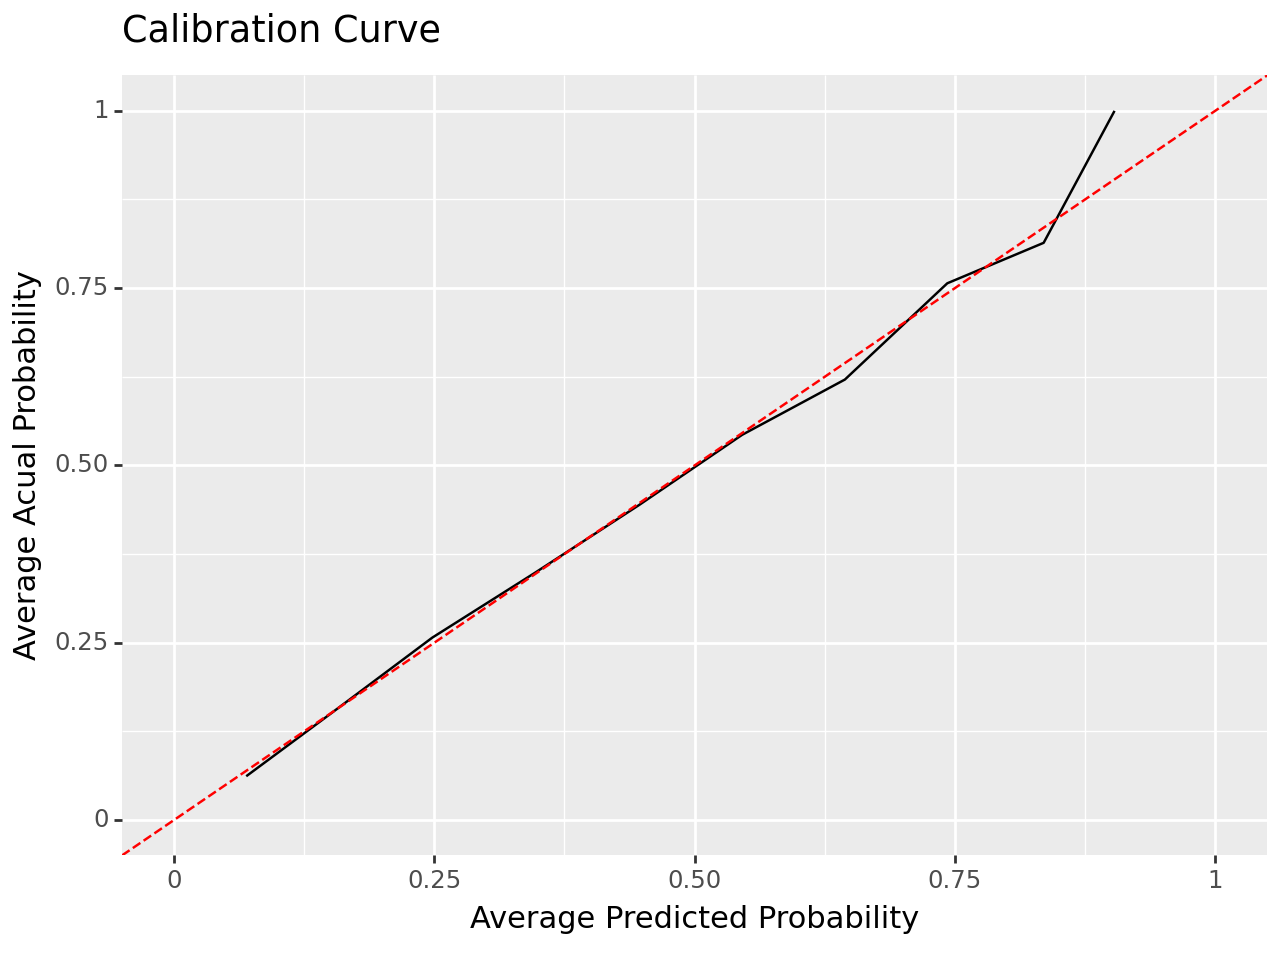

<Figure Size: (640 x 480)>

In [7]:

#calibration for logistic
prob_true, prob_pred = calibration_curve(y_train, y_pred_train_prob, n_bins=10)

(ggplot() + geom_line(aes(x = prob_pred, y = prob_true))
+ geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
labs(x = "Average Predicted Probability",
     y = "Average Acual Probability",
     title = "Calibration Curve") +
ylim([0,1]) + xlim([0,1]))



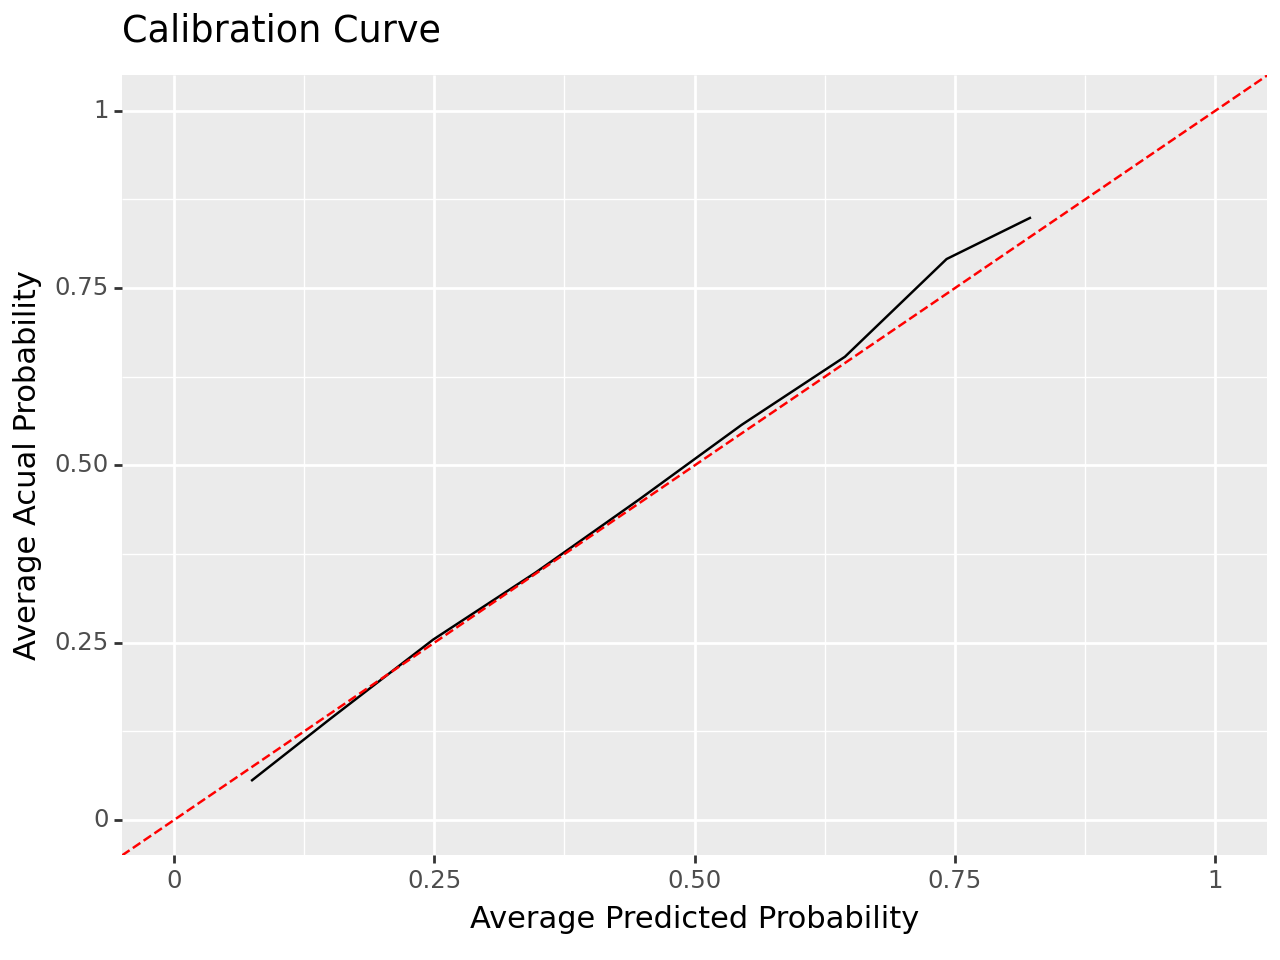

<Figure Size: (640 x 480)>

In [8]:
#calibration for tree
prob_true, prob_pred = calibration_curve(y_train, y_pred_train_prob_gb, n_bins=10)

(ggplot() + geom_line(aes(x = prob_pred, y = prob_true))
+ geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
labs(x = "Average Predicted Probability",
     y = "Average Acual Probability",
     title = "Calibration Curve") +
ylim([0,1]) + xlim([0,1]))

In [9]:
new_data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingNEW.csv")
#new_data.head()
new_data.dropna(inplace = True)
new_data.reset_index(inplace = True)
predicted_probabilities = pipe.predict_proba(new_data)[:, 1]
new_data['predicted_churn'] = predicted_probabilities
new_data.head()


,index,gender,age,income,monthssubbed,plan,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,topgenre,secondgenre,predicted_churn
0,0,woman,25.0,73.51,27,B,22.22,1,2,1,0,1,0,263.62,Action,Drama,0.505349
1,1,woman,62.0,71.17,70,P,17.54,1,3,0,0,0,0,218.19,RomanticComedy,Thriller,0.078943
2,2,nonbinary,70.0,86.25,39,A,3.34,1,3,0,0,0,1,36.40,Documentary,ScienceFiction,0.108723
3,3,nonbinary,25.0,70.30,48,B,7.57,0,4,1,0,1,0,72.49,Drama,Comedy,0.270654
4,4,woman,47.0,75.81,44,B,5.90,0,5,1,0,0,1,72.99,Documentary,Comedy,0.272436


In [10]:
highest_risk = new_data.nlargest(200,'predicted_churn')
print(highest_risk.head());

     index gender   age  income  monthssubbed plan  meanhourswatched  \
42      42  woman  26.0   57.69             6    B             22.30   
339    351  woman  20.0   52.05             1    P              9.36   
217    223  woman  69.0   33.62             4    B             22.90   
228    234  woman  28.0   46.20             4    P              1.65   
103    104  woman  39.0   52.25            21    B             29.91   

     competitorsub  numprofiles  cancelled  downgraded  bundle  kids  \
42               0            3          1           0       0     0   
339              1            2          1           0       0     1   
217              1            3          0           0       0     0   
228              1            2          1           1       1     1   
103              1            1          1           0       0     0   

     longestsession  topgenre     secondgenre  predicted_churn  
42           122.39    Comedy        Thriller         0.856613  
339 

In [11]:
# Build Empty
favorite_films = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingFILMS.csv")
vars = ["age", "income", "meanhourswatched"]

z = make_column_transformer((StandardScaler(), vars))
nn = NearestNeighbors(n_neighbors= 10)
pipe_films = Pipeline([("z", z), ("model", nn)])
pipe_films.fit(favorite_films[vars])


# get distances, neighbors
# first grab model to make predictions, then use pre-processor to z score data
distances, neighbors = pipe_films.named_steps["model"].kneighbors(pipe_films.named_steps["z"].transform(highest_risk[vars]))

# add neighbors to data file
highest_risk = highest_risk.assign(neighbors = list(neighbors))
highest_risk.head()

# write data to csv
highest_risk.to_csv("myfile.csv", index = False)